# Plot figure 9

## Setup

In [41]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy

import numpy as np 
import pickle
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import sys
sys.path.append('/home/av555/iclr/')

## Plot utils

In [49]:
def plot_gpanel(ax, title=False, title_text=None, left=False, top=False, right=False, ylabel=None):
    ax.coastlines()
    ax.gridlines()
    #ax.set_extent([-5.2, 1, 49.8, 54])
    ax.set_extent([6.25, 15.75, 47.25, 54.75])
    ax.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'))
    gl = ax.gridlines()
    
    ax.set_ylabel(ylabel)
    plt.ylabel(ylabel)
    
    #gl.xlabels_top = False
    if left:
        gl.ylabels_left = False
    if right:
        gl.ylabels_right = True
    if top:
        gl.xlabels_top = True
    if title:
        ax.set_title(title_text)
        
    

In [50]:
def plot_grow(ax_list, model_dict, title=False, lower=False, top=False, ylabel=None):
    plot_gpanel(ax_list[0], title=title, title_text="ERA-I Reanalysis", top=top, left=True, ylabel=ylabel)
    vmin = -15
    vmax = 15
    
    p = ax_list[0].pcolormesh(model_dict["x_context"][...,0], 
                              model_dict["x_context"][...,1], 
                              model_dict["reanalysis"], 
                              cmap="seismic", 
                              vmin=vmin, vmax=vmax) #5) #, vmin=-5, vmax=15) #, transform=rotated_pole)
    
    
    if lower:
        c = plt.colorbar(p, orientation="horizontal", ax=ax_list[0], pad=0.1)
        c.set_label("Maximum temperature (C)")
    
    plot_gpanel(ax_list[1], title=title, title_text="Predicted $\mu$", top=top)
    p = ax_list[1].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["pred_mean"], 
                              cmap="seismic", 
                              vmin=vmin, vmax=vmax) #, transform=rotated_pole)
    if lower:
        c = plt.colorbar(p, orientation="horizontal", ax=ax_list[1], pad=0.1)
        c.set_label("Maximum temperature (C)")
    
    plot_gpanel(ax_list[2], title=title, title_text="Sample 1", top=top)
    p = ax_list[2].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["s1"],
                              cmap="seismic", 
                              vmin=vmin, vmax=vmax) #, transform=rotated_pole)
    if lower:
        c = plt.colorbar(p, orientation="horizontal", ax=ax_list[2], pad=0.1)
        c.set_label("Maximum temperature (C)")
    
    plot_gpanel(ax_list[3], title=title, title_text="Sample 2", top=top)
    p = ax_list[3].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["s2"],
                              cmap="seismic", 
                              vmin=vmin, vmax=vmax) #, transform=rotated_pole)
    if lower:
        c = plt.colorbar(p, orientation="horizontal", ax=ax_list[3], pad=0.1)
        c.set_label("Maximum temperature (C)")
    
    plot_gpanel(ax_list[4], title=title, title_text="Sample 3", right=True, top=top)
    p = ax_list[4].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["s3"], 
                              cmap="seismic", 
                              vmin=vmin, vmax=vmax) #, transform=rotated_pole)
    if lower:
        c = plt.colorbar(p, orientation="horizontal", ax=ax_list[4], pad=0.1)
        c.set_label("Maximum temperature (C)")
    

In [51]:
def plot_gfigure(convcnp_dict, convgnp_linear_dict, convgnp_kvv_dict):
    
    fig, (r1, r2, r3) = plt.subplots(
        3, 5, subplot_kw={'projection': crs.PlateCarree()}, figsize=(15,7))
    
    # convCNP
    plot_grow(r1, convcnp_dict, title=True, top=True, ylabel="ConvGNP (meanfield)")
    r1[0].text(-0.07, 0.55, 'ConvCNP', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=r1[0].transAxes)
    
    # convGNP linear
    plot_grow(r2, convgnp_linear_dict, title=False, ylabel="ConvGNP (linear)")
    r2[0].text(-0.07, 0.55, 'ConvGNP linear', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=r2[0].transAxes)
    
    # convGNP kvv
    plot_grow(r3, convgnp_kvv_dict, title=False, lower=False, ylabel="ConvGNP (kvv)")
    r3[0].text(-0.07, 0.55, 'ConvGNP kvv', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=r3[0].transAxes)
    
    plt.tight_layout()

    plt.savefig("/home/av555/iclr/test_figure.png", dpi=150)
    

## Make plots

In [52]:
with open('/home/av555/iclr/convCNP.pkl', 'rb') as handle:
    convcnp_dict = pickle.load(handle)

In [53]:
with open('/home/av555/iclr/convGNP_linear.pkl', 'rb') as handle:
    convgnp_linear_dict = pickle.load(handle)

In [54]:
with open('/home/av555/iclr/convGNP_kvv.pkl', 'rb') as handle:
    convgnp_kvv_dict = pickle.load(handle)

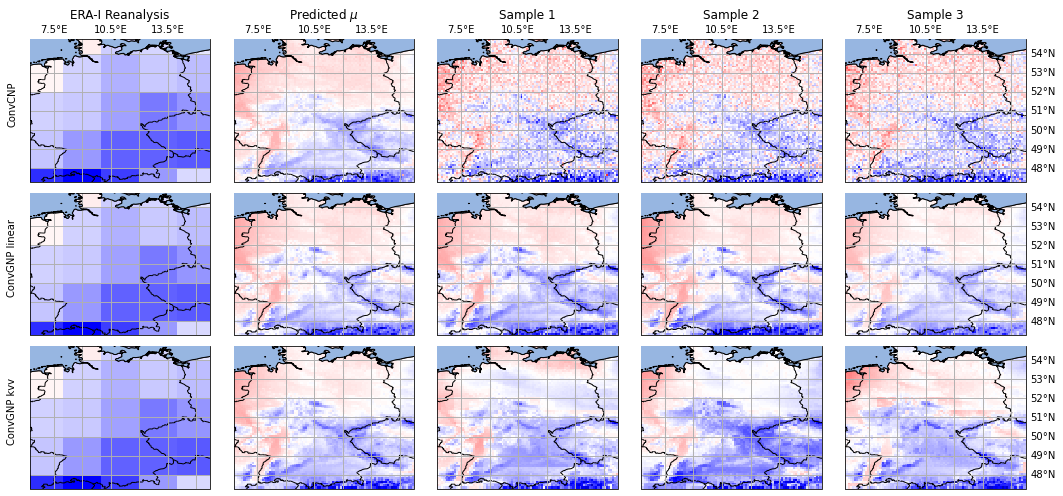

In [55]:
plot_gfigure(convcnp_dict, convgnp_linear_dict, convgnp_kvv_dict)